In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from env import get_db_url
import acquire as acq

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
df = acq.get_superstore_df()
df.info()
df.head()

Reading from CSV file...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1734 non-null   int64  
 1   Region ID      1734 non-null   int64  
 2   Product ID     1734 non-null   object 
 3   Customer ID    1734 non-null   object 
 4   Category ID    1734 non-null   int64  
 5   Order ID       1734 non-null   object 
 6   Order Date     1734 non-null   object 
 7   Ship Date      1734 non-null   object 
 8   Ship Mode      1734 non-null   object 
 9   Segment        1734 non-null   object 
 10  Country        1734 non-null   object 
 11  City           1734 non-null   object 
 12  State          1734 non-null   object 
 13  Postal Code    1734 non-null   float64
 14  Sales          1734 non-null   float64
 15  Quantity       1734 non-null   float64
 16  Discount       1734 non-null   float64
 17  Profit         1734 non-nul

,Unnamed: 0,Region ID,Product ID,Customer ID,Category ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Sales,Quantity,Discount,Profit,Category,Sub-Category,Customer Name,Product Name,Region Name
0,0,1,FUR-BO-10001798,CG-12520,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,261.9600,2.0,0.00,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South
1,1,1,FUR-CH-10000454,CG-12520,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,731.9400,3.0,0.00,219.5820,Furniture,Chairs,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",South
2,2,1,FUR-TA-10000577,SO-20335,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,957.5775,5.0,0.45,-383.0310,Furniture,Tables,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,South
3,3,1,OFF-ST-10000760,SO-20335,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,22.3680,2.0,0.20,2.5164,Office Supplies,Storage,Sean O'Donnell,Eldon Fold 'N Roll Cart System,South
4,4,1,OFF-PA-10002365,AA-10480,11,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,Consumer,United States,Concord,North Carolina,28027.0,15.5520,3.0,0.20,5.4432,Office Supplies,Paper,Andrew Allen,Xerox 1967,South


In [3]:
df = df.drop(columns= ['Unnamed: 0'])

In [4]:
df = acq.clean_superstore_df(df)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1734 entries, 2014-01-04 to 2017-12-30
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   product_id   1734 non-null   object         
 1   customer_id  1734 non-null   object         
 2   order_id     1734 non-null   object         
 3   order_date   1734 non-null   datetime64[ns] 
 4   ship_date    1734 non-null   datetime64[ns] 
 5   ship_mode    1734 non-null   object         
 6   segment      1734 non-null   object         
 7   country      1734 non-null   object         
 8   city         1734 non-null   object         
 9   state        1734 non-null   object         
 10  postal_code  1734 non-null   float64        
 11  sales        1734 non-null   float64        
 12  quantity     1734 non-null   float64        
 13  discount     1734 non-null   float64        
 14  profit       1734 non-null   float64        
 15  category     1734 no

,product_id,customer_id,order_id,order_date,ship_date,ship_mode,segment,country,city,state,postal_code,sales,quantity,discount,profit,category,sub_cat,cust_name,prod_name,region,ship_time
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-04,OFF-LA-10003223,PO-19195,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540.0,11.784,3.0,0.2,4.2717,Office Supplies,Labels,Phillina Ober,Avery 508,Central,4 days
2014-01-04,OFF-ST-10002743,PO-19195,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540.0,272.736,3.0,0.2,-64.7748,Office Supplies,Storage,Phillina Ober,SAFCO Boltless Steel Shelving,Central,4 days
2014-01-04,OFF-BI-10004094,PO-19195,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540.0,3.540,2.0,0.8,-5.4870,Office Supplies,Binders,Phillina Ober,GBC Standard Plastic Binding Systems Combs,Central,4 days
2014-01-09,TEC-AC-10001266,MS-17830,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,Consumer,United States,Laredo,Texas,78041.0,31.200,3.0,0.2,9.7500,Technology,Accessories,Melanie Seite,Memorex Micro Travel Drive 8 GB,Central,4 days
2014-01-09,OFF-AR-10004078,MS-17830,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,Consumer,United States,Laredo,Texas,78041.0,9.344,2.0,0.2,1.1680,Office Supplies,Art,Melanie Seite,Newell 312,Central,4 days


In [5]:
df.head()

,product_id,customer_id,order_id,order_date,ship_date,ship_mode,segment,country,city,state,postal_code,sales,quantity,discount,profit,category,sub_cat,cust_name,prod_name,region,ship_time
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-04,OFF-LA-10003223,PO-19195,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540.0,11.784,3.0,0.2,4.2717,Office Supplies,Labels,Phillina Ober,Avery 508,Central,4 days
2014-01-04,OFF-ST-10002743,PO-19195,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540.0,272.736,3.0,0.2,-64.7748,Office Supplies,Storage,Phillina Ober,SAFCO Boltless Steel Shelving,Central,4 days
2014-01-04,OFF-BI-10004094,PO-19195,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540.0,3.540,2.0,0.8,-5.4870,Office Supplies,Binders,Phillina Ober,GBC Standard Plastic Binding Systems Combs,Central,4 days
2014-01-09,TEC-AC-10001266,MS-17830,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,Consumer,United States,Laredo,Texas,78041.0,31.200,3.0,0.2,9.7500,Technology,Accessories,Melanie Seite,Memorex Micro Travel Drive 8 GB,Central,4 days
2014-01-09,OFF-AR-10004078,MS-17830,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,Consumer,United States,Laredo,Texas,78041.0,9.344,2.0,0.2,1.1680,Office Supplies,Art,Melanie Seite,Newell 312,Central,4 days


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1734 entries, 2014-01-04 to 2017-12-30
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   product_id   1734 non-null   object         
 1   customer_id  1734 non-null   object         
 2   order_id     1734 non-null   object         
 3   order_date   1734 non-null   datetime64[ns] 
 4   ship_date    1734 non-null   datetime64[ns] 
 5   ship_mode    1734 non-null   object         
 6   segment      1734 non-null   object         
 7   country      1734 non-null   object         
 8   city         1734 non-null   object         
 9   state        1734 non-null   object         
 10  postal_code  1734 non-null   float64        
 11  sales        1734 non-null   float64        
 12  quantity     1734 non-null   float64        
 13  discount     1734 non-null   float64        
 14  profit       1734 non-null   float64        
 15  category     1734 no

### Feature engineering - Unit price = (sales - profit)/quantity

In [6]:
df['unit_cost'] = (df.sales - df.profit) / df.quantity
# Cast postal code as int type instead of float
df.postal_code = df.postal_code.astype('int64')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1734 entries, 2014-01-04 to 2017-12-30
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   product_id   1734 non-null   object         
 1   customer_id  1734 non-null   object         
 2   order_id     1734 non-null   object         
 3   order_date   1734 non-null   datetime64[ns] 
 4   ship_date    1734 non-null   datetime64[ns] 
 5   ship_mode    1734 non-null   object         
 6   segment      1734 non-null   object         
 7   country      1734 non-null   object         
 8   city         1734 non-null   object         
 9   state        1734 non-null   object         
 10  postal_code  1734 non-null   int64          
 11  sales        1734 non-null   float64        
 12  quantity     1734 non-null   float64        
 13  discount     1734 non-null   float64        
 14  profit       1734 non-null   float64        
 15  category     1734 no

,product_id,customer_id,order_id,order_date,ship_date,ship_mode,segment,country,city,state,postal_code,sales,quantity,discount,profit,category,sub_cat,cust_name,prod_name,region,ship_time,unit_cost
order_date,,,,,,,,,,,,,,,,,,,,,,
2014-01-04,OFF-LA-10003223,PO-19195,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540,11.784,3.0,0.2,4.2717,Office Supplies,Labels,Phillina Ober,Avery 508,Central,4 days,2.5041
2014-01-04,OFF-ST-10002743,PO-19195,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540,272.736,3.0,0.2,-64.7748,Office Supplies,Storage,Phillina Ober,SAFCO Boltless Steel Shelving,Central,4 days,112.5036
2014-01-04,OFF-BI-10004094,PO-19195,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540,3.540,2.0,0.8,-5.4870,Office Supplies,Binders,Phillina Ober,GBC Standard Plastic Binding Systems Combs,Central,4 days,4.5135
2014-01-09,TEC-AC-10001266,MS-17830,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,Consumer,United States,Laredo,Texas,78041,31.200,3.0,0.2,9.7500,Technology,Accessories,Melanie Seite,Memorex Micro Travel Drive 8 GB,Central,4 days,7.1500
2014-01-09,OFF-AR-10004078,MS-17830,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,Consumer,United States,Laredo,Texas,78041,9.344,2.0,0.2,1.1680,Office Supplies,Art,Melanie Seite,Newell 312,Central,4 days,4.0880


### Feature engineering: Profit Margin = profit / (sales - (discount * sales))

In [7]:
df['profit_margin'] = df.profit / (df.sales - (df.sales * df.discount))
df.select_dtypes(include= np.float64).describe()

,sales,quantity,discount,profit,unit_cost,profit_margin
count,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000
mean,229.206358,3.794694,0.160110,21.880351,52.901415,-0.163975
std,532.862614,2.297407,0.206419,202.891949,121.305650,1.671993
min,1.080000,1.000000,0.000000,-3839.990400,0.657200,-13.750000
25%,16.695000,2.000000,0.000000,1.702400,3.435300,0.078125
50%,52.245000,3.000000,0.200000,8.073050,13.104300,0.270000
75%,209.917500,5.000000,0.200000,27.414450,56.885050,0.437500
max,8159.952000,14.000000,0.800000,3177.475000,2959.992600,0.500000


### Company operating at overall -16% profit margin ?

In [37]:
len(df[(df.profit_margin <= 0) | (df.profit <= 0)])

340

In [8]:
df.groupby(df.category).unit_cost.mean()

category
Furniture          96.058894
Office Supplies    24.339666
Technology         98.656754
Name: unit_cost, dtype: float64

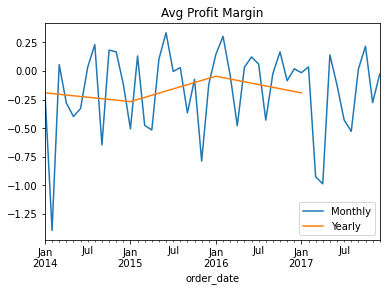

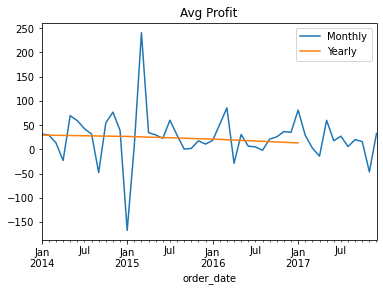

In [9]:
df.resample('M').profit_margin.mean().plot(label= 'Monthly')
df.resample('Y').profit_margin.mean().plot(label= 'Yearly')
plt.title('Avg Profit Margin')
plt.legend()
plt.show()
df.resample('M').profit.mean().plot(label= 'Monthly')
df.resample('Y').profit.mean().plot(label= 'Yearly')
plt.title('Avg Profit')
plt.legend()

In [10]:
train_size = round(len(df)*.5)
validate_size = round(len(df)*.3)
validate_end_idx = train_size + validate_size
test_size = (len(df) - train_size - validate_size)

train = df[:train_size]
validate = df[train_size:validate_end_idx]
test = df[validate_end_idx:]

print(train.shape, validate.shape, test.shape)

(867, 23) (520, 23) (347, 23)


In [11]:
train_size + validate_size + test_size == len(df)

True

In [12]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 867 entries, 2014-01-04 to 2016-05-26
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   product_id     867 non-null    object         
 1   customer_id    867 non-null    object         
 2   order_id       867 non-null    object         
 3   order_date     867 non-null    datetime64[ns] 
 4   ship_date      867 non-null    datetime64[ns] 
 5   ship_mode      867 non-null    object         
 6   segment        867 non-null    object         
 7   country        867 non-null    object         
 8   city           867 non-null    object         
 9   state          867 non-null    object         
 10  postal_code    867 non-null    int64          
 11  sales          867 non-null    float64        
 12  quantity       867 non-null    float64        
 13  discount       867 non-null    float64        
 14  profit         867 non-null    float64 

,product_id,customer_id,order_id,order_date,ship_date,ship_mode,segment,country,city,state,postal_code,sales,quantity,discount,profit,category,sub_cat,cust_name,prod_name,region,ship_time,unit_cost,profit_margin
order_date,,,,,,,,,,,,,,,,,,,,,,,
2014-01-04,OFF-LA-10003223,PO-19195,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540,11.784,3.0,0.2,4.2717,Office Supplies,Labels,Phillina Ober,Avery 508,Central,4 days,2.5041,0.453125
2014-01-04,OFF-ST-10002743,PO-19195,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540,272.736,3.0,0.2,-64.7748,Office Supplies,Storage,Phillina Ober,SAFCO Boltless Steel Shelving,Central,4 days,112.5036,-0.296875
2014-01-04,OFF-BI-10004094,PO-19195,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,60540,3.540,2.0,0.8,-5.4870,Office Supplies,Binders,Phillina Ober,GBC Standard Plastic Binding Systems Combs,Central,4 days,4.5135,-7.750000
2014-01-09,TEC-AC-10001266,MS-17830,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,Consumer,United States,Laredo,Texas,78041,31.200,3.0,0.2,9.7500,Technology,Accessories,Melanie Seite,Memorex Micro Travel Drive 8 GB,Central,4 days,7.1500,0.390625
2014-01-09,OFF-AR-10004078,MS-17830,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,Consumer,United States,Laredo,Texas,78041,9.344,2.0,0.2,1.1680,Office Supplies,Art,Melanie Seite,Newell 312,Central,4 days,4.0880,0.156250


In [13]:
train.category.value_counts()

Office Supplies    513
Furniture          180
Technology         174
Name: category, dtype: int64

In [15]:
print(f'Furniture items: {len(train[train.category == "Furniture"].prod_name.value_counts())}')
print('------------')
print(f'Office Supply items: {len(train[train.category == "Office Supplies"].prod_name.value_counts())}')
print('------------')
print(f'Tech items: {len(train[train.category == "Technology"].prod_name.value_counts())}')

Furniture items: 133
------------
Office Supply items: 408
------------
Tech items: 138


In [16]:
ofc_supplies = train.copy()[train.category == 'Office Supplies']

In [20]:
ofc_supplies.describe()

,postal_code,sales,quantity,discount,profit,ship_time,unit_cost,profit_margin
count,513.000000,513.000000,513.000000,513.000000,513.000000,513,513.000000,513.000000
mean,53972.709552,118.357503,3.826511,0.167641,19.338098,3 days 23:03:51.578947368,26.982226,-0.369251
std,31961.419750,354.234626,2.291952,0.238087,181.939483,1 days 17:38:23.274076810,69.487964,2.149088
min,1841.000000,1.080000,1.000000,0.000000,-1850.946400,0 days 00:00:00,0.657200,-13.000000
25%,20016.000000,11.360000,2.000000,0.000000,1.570000,3 days 00:00:00,2.774400,0.109375
50%,53209.000000,29.600000,3.000000,0.000000,6.220800,4 days 00:00:00,7.029000,0.328125
75%,85705.000000,101.880000,5.000000,0.200000,18.769500,5 days 00:00:00,21.989000,0.460000
max,98115.000000,6354.950000,14.000000,0.800000,3177.475000,7 days 00:00:00,816.153800,0.500000


In [21]:
ofc_supplies = ofc_supplies.drop(columns= ['postal_code'])
ofc_supplies.head()

,product_id,customer_id,order_id,order_date,ship_date,ship_mode,segment,country,city,state,sales,quantity,discount,profit,category,sub_cat,cust_name,prod_name,region,ship_time,unit_cost,profit_margin
order_date,,,,,,,,,,,,,,,,,,,,,,
2014-01-04,OFF-LA-10003223,PO-19195,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,11.784,3.0,0.2,4.2717,Office Supplies,Labels,Phillina Ober,Avery 508,Central,4 days,2.5041,0.453125
2014-01-04,OFF-ST-10002743,PO-19195,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,272.736,3.0,0.2,-64.7748,Office Supplies,Storage,Phillina Ober,SAFCO Boltless Steel Shelving,Central,4 days,112.5036,-0.296875
2014-01-04,OFF-BI-10004094,PO-19195,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,3.540,2.0,0.8,-5.4870,Office Supplies,Binders,Phillina Ober,GBC Standard Plastic Binding Systems Combs,Central,4 days,4.5135,-7.750000
2014-01-09,OFF-AR-10004078,MS-17830,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,Consumer,United States,Laredo,Texas,9.344,2.0,0.2,1.1680,Office Supplies,Art,Melanie Seite,Newell 312,Central,4 days,4.0880,0.156250
2014-01-10,OFF-LA-10004272,AJ-10780,CA-2014-149020,2014-01-10,2014-01-15,Standard Class,Corporate,United States,Springfield,Virginia,2.890,1.0,0.0,1.3583,Office Supplies,Labels,Anthony Jacobs,Avery 482,South,5 days,1.5317,0.470000


In [22]:
furniture = train.copy()[train.category == 'Furniture']
furniture.describe()

,postal_code,sales,quantity,discount,profit,ship_time,unit_cost,profit_margin
count,180.000000,180.000000,180.000000,180.000000,180.000000,180,180.000000,180.000000
mean,53583.350000,442.640998,4.227778,0.170944,-2.599369,3 days 22:40:00,99.767107,-0.043397
std,31744.453984,572.340189,2.419268,0.172800,196.106849,1 days 17:35:11.105039228,105.333676,0.637091
min,3301.000000,2.960000,1.000000,0.000000,-1665.052200,0 days 00:00:00,0.985600,-4.444444
25%,21618.750000,65.074000,2.000000,0.000000,-14.022525,2 days 18:00:00,16.357650,-0.072385
50%,48227.000000,226.509000,4.000000,0.200000,10.930450,4 days 00:00:00,70.065400,0.140312
75%,85068.250000,603.920000,5.250000,0.200000,45.276300,5 days 00:00:00,157.467825,0.280000
max,98115.000000,3610.848000,14.000000,0.700000,580.539400,7 days 00:00:00,678.354600,0.480000


In [23]:
furniture = furniture.drop(columns= ['postal_code'])
furniture.head()

,product_id,customer_id,order_id,order_date,ship_date,ship_mode,segment,country,city,state,sales,quantity,discount,profit,category,sub_cat,cust_name,prod_name,region,ship_time,unit_cost,profit_margin
order_date,,,,,,,,,,,,,,,,,,,,,,
2014-01-10,FUR-FU-10000965,AJ-10780,CA-2014-149020,2014-01-10,2014-01-15,Standard Class,Corporate,United States,Springfield,Virginia,51.940,1.0,0.0,21.2954,Furniture,Furnishings,Anthony Jacobs,"Howard Miller 11-1/2"" Diameter Ridgewood Wall Clock",South,5 days,30.6446,0.41000
2014-01-11,FUR-FU-10000010,SV-20365,CA-2014-130092,2014-01-11,2014-01-14,First Class,Consumer,United States,Dover,Delaware,9.940,2.0,0.0,3.0814,Furniture,Furnishings,Seth Vernon,"DAX Value U-Channel Document Frames, Easel Back",East,3 days,3.4293,0.31000
2014-01-16,FUR-FU-10001095,DL-13315,CA-2014-115791,2014-01-16,2014-01-18,Second Class,Consumer,United States,Philadelphia,Pennsylvania,127.104,6.0,0.2,28.5984,Furniture,Furnishings,Delfina Latchford,DAX Black Cherry Wood-Tone Poster Frame,East,2 days,16.4176,0.28125
2014-01-20,FUR-CH-10002331,HL-15040,US-2014-147627,2014-01-20,2014-01-26,Standard Class,Consumer,United States,Jonesboro,Arkansas,1067.940,3.0,0.0,224.2674,Furniture,Chairs,Hunter Lopez,Hon 4700 Series Mobuis Mid-Back Task Chairs with Adjustable Arms,South,6 days,281.2242,0.21000
2014-01-20,FUR-FU-10003194,HL-15040,US-2014-147627,2014-01-20,2014-01-26,Standard Class,Consumer,United States,Jonesboro,Arkansas,38.600,4.0,0.0,11.5800,Furniture,Furnishings,Hunter Lopez,"Eldon Expressions Desk Accessory, Wood Pencil Holder, Oak",South,6 days,6.7550,0.30000


In [24]:
tech = train.copy()[train.category == 'Technology']
tech.describe()

,postal_code,sales,quantity,discount,profit,ship_time,unit_cost,profit_margin
count,174.000000,174.000000,174.000000,174.000000,174.000000,174,174.000000,174.000000
mean,57833.580460,501.003851,3.827586,0.143678,78.448341,3 days 17:31:02.068965517,100.240060,0.104448
std,32017.651427,925.048655,2.294537,0.149141,324.385987,1 days 17:27:40.085873621,164.372644,0.559638
min,3301.000000,7.992000,1.000000,0.000000,-1359.992000,0 days 00:00:00,2.393700,-4.666667
25%,28052.000000,71.802000,2.000000,0.000000,5.503575,2 days 06:00:00,21.787600,0.093750
50%,69607.500000,194.112000,3.000000,0.200000,30.146250,4 days 00:00:00,47.443500,0.198785
75%,90008.000000,484.207500,5.000000,0.200000,75.992925,5 days 00:00:00,108.398025,0.350000
max,98502.000000,8159.952000,12.000000,0.700000,2400.965700,7 days 00:00:00,1189.993000,0.500000


In [25]:
tech = tech.drop(columns= ['postal_code'])
tech.head()

,product_id,customer_id,order_id,order_date,ship_date,ship_mode,segment,country,city,state,sales,quantity,discount,profit,category,sub_cat,cust_name,prod_name,region,ship_time,unit_cost,profit_margin
order_date,,,,,,,,,,,,,,,,,,,,,,
2014-01-09,TEC-AC-10001266,MS-17830,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,Consumer,United States,Laredo,Texas,31.20,3.0,0.2,9.7500,Technology,Accessories,Melanie Seite,Memorex Micro Travel Drive 8 GB,Central,4 days,7.1500,0.390625
2014-01-13,TEC-AC-10003174,CS-12250,CA-2014-162775,2014-01-13,2014-01-15,Second Class,Corporate,United States,Bossier City,Louisiana,646.74,6.0,0.0,258.6960,Technology,Accessories,Chris Selesnick,Plantronics S12 Corded Telephone Headset System,South,2 days,64.6740,0.400000
2014-01-16,TEC-PH-10004614,DL-13315,CA-2014-115791,2014-01-16,2014-01-18,Second Class,Consumer,United States,Philadelphia,Pennsylvania,124.20,3.0,0.4,-31.0500,Technology,Phones,Delfina Latchford,AT&T 841000 Phone,East,2 days,51.7500,-0.416667
2014-01-20,TEC-PH-10001061,HL-15040,US-2014-147627,2014-01-20,2014-01-26,Standard Class,Consumer,United States,Jonesboro,Arkansas,699.93,7.0,0.0,181.9818,Technology,Phones,Hunter Lopez,Apple iPhone 5C,South,6 days,73.9926,0.260000
2014-02-01,TEC-AC-10001432,BD-11500,CA-2014-140795,2014-02-01,2014-02-03,First Class,Consumer,United States,Green Bay,Wisconsin,468.90,6.0,0.0,206.3160,Technology,Accessories,Bradley Drucker,Enermax Aurora Lite Keyboard,Central,2 days,43.7640,0.440000


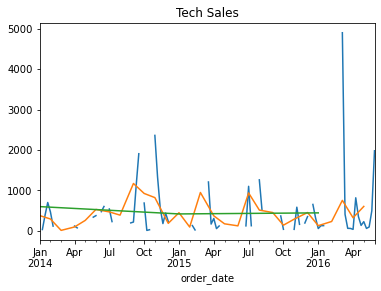

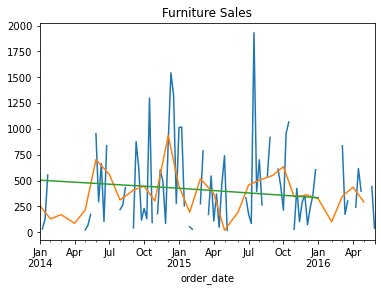

Text(0.5, 1.0, 'Office Supplies Sales')

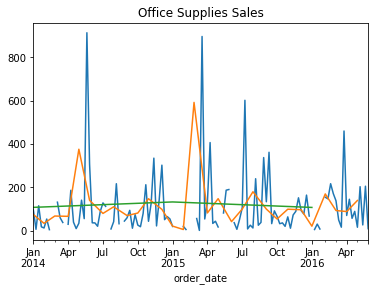

In [26]:
tech.resample('W').sales.mean().plot()
tech.resample('M').sales.mean().plot()
tech.resample('Y').sales.mean().plot()
plt.title('Tech Sales')
plt.show()
furniture.resample('W').sales.mean().plot()
furniture.resample('M').sales.mean().plot()
furniture.resample('Y').sales.mean().plot()
plt.title('Furniture Sales')
plt.show()
ofc_supplies.resample('W').sales.mean().plot()
ofc_supplies.resample('M').sales.mean().plot()
ofc_supplies.resample('Y').sales.mean().plot()
plt.title('Office Supplies Sales')

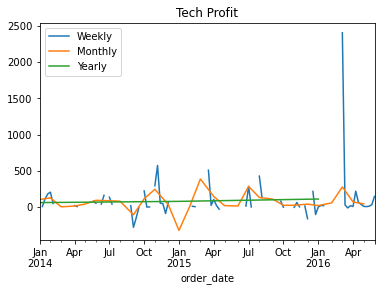

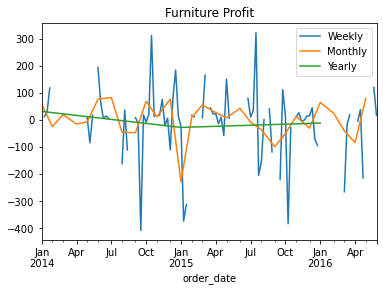

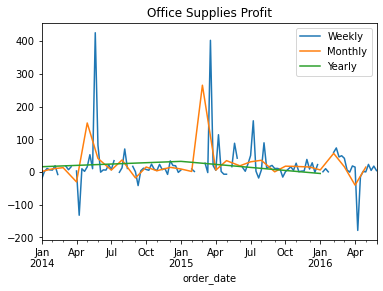

In [27]:
tech.resample('W').profit.mean().plot(label='Weekly')
tech.resample('M').profit.mean().plot(label='Monthly')
tech.resample('Y').profit.mean().plot(label='Yearly')
plt.title('Tech Profit')
plt.legend()
plt.show()
furniture.resample('W').profit.mean().plot(label='Weekly')
furniture.resample('M').profit.mean().plot(label='Monthly')
furniture.resample('Y').profit.mean().plot(label='Yearly')
plt.title('Furniture Profit')
plt.legend()
plt.show()
ofc_supplies.resample('W').profit.mean().plot(label='Weekly')
ofc_supplies.resample('M').profit.mean().plot(label='Monthly')
ofc_supplies.resample('Y').profit.mean().plot(label='Yearly')
plt.title('Office Supplies Profit')
plt.legend()

In [44]:
furniture.head(30)

,product_id,customer_id,order_id,order_date,ship_date,ship_mode,segment,country,city,state,postal_code,sales,quantity,discount,profit,category,sub_cat,cust_name,prod_name,region,ship_time,unit_price,profit_margin
order_date,,,,,,,,,,,,,,,,,,,,,,,
2014-01-10,FUR-FU-10000965,AJ-10780,CA-2014-149020,2014-01-10,2014-01-15,Standard Class,Corporate,United States,Springfield,Virginia,22153,51.940,1.0,0.00,21.2954,Furniture,Furnishings,Anthony Jacobs,"Howard Miller 11-1/2"" Diameter Ridgewood Wall Clock",South,5 days,30.6446,0.410000
2014-01-11,FUR-FU-10000010,SV-20365,CA-2014-130092,2014-01-11,2014-01-14,First Class,Consumer,United States,Dover,Delaware,19901,9.940,2.0,0.00,3.0814,Furniture,Furnishings,Seth Vernon,"DAX Value U-Channel Document Frames, Easel Back",East,3 days,3.4293,0.310000
2014-01-16,FUR-FU-10001095,DL-13315,CA-2014-115791,2014-01-16,2014-01-18,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19134,127.104,6.0,0.20,28.5984,Furniture,Furnishings,Delfina Latchford,DAX Black Cherry Wood-Tone Poster Frame,East,2 days,16.4176,0.281250
2014-01-20,FUR-CH-10002331,HL-15040,US-2014-147627,2014-01-20,2014-01-26,Standard Class,Consumer,United States,Jonesboro,Arkansas,72401,1067.940,3.0,0.00,224.2674,Furniture,Chairs,Hunter Lopez,Hon 4700 Series Mobuis Mid-Back Task Chairs with Adjustable Arms,South,6 days,281.2242,0.210000
2014-01-20,FUR-FU-10003194,HL-15040,US-2014-147627,2014-01-20,2014-01-26,Standard Class,Consumer,United States,Jonesboro,Arkansas,72401,38.600,4.0,0.00,11.5800,Furniture,Furnishings,Hunter Lopez,"Eldon Expressions Desk Accessory, Wood Pencil Holder, Oak",South,6 days,6.7550,0.300000
2014-02-12,FUR-CH-10000225,SC-20095,US-2014-110674,2014-02-12,2014-02-18,Standard Class,Consumer,United States,Concord,California,94521,129.568,2.0,0.20,-24.2940,Furniture,Chairs,Sanjit Chand,"Global Geo Office Task Chair, Gray",West,6 days,76.9310,-0.234375
2014-03-01,FUR-CH-10004063,DB-13060,CA-2014-104269,2014-03-01,2014-03-06,Second Class,Consumer,United States,Seattle,Washington,98115,457.568,2.0,0.20,51.4764,Furniture,Chairs,Dave Brooks,Global Deluxe High-Back Manager's Chair,West,5 days,203.0458,0.140625
2014-03-11,FUR-FU-10003981,CK-12205,CA-2014-166884,2014-03-11,2014-03-16,Second Class,Consumer,United States,Columbus,Ohio,43229,8.320,5.0,0.20,2.2880,Furniture,Furnishings,Chloris Kastensmidt,Eldon Wave Desk Accessories,East,5 days,1.2064,0.343750
2014-03-15,FUR-FU-10001756,AS-10240,CA-2014-149958,2014-03-15,2014-03-19,Standard Class,Consumer,United States,Tampa,Florida,33614,45.696,3.0,0.20,5.1408,Furniture,Furnishings,Alan Shonely,"Eldon Expressions Desk Accessory, Wood Photo Frame, Mahogany",South,4 days,13.5184,0.140625


In [26]:
furniture.sub_cat.value_counts()

Furnishings    76
Chairs         48
Tables         38
Bookcases      18
Name: sub_cat, dtype: int64

In [50]:
print(f'Avg profit on furniture: {furniture.profit.mean()}\nAvg furniture sales: {furniture.sales.mean()}')

Avg profit on furniture: -2.599369444444462
Avg furniture sales: 442.6409983333332


In [51]:
furniture.groupby(furniture.sub_cat).profit.mean()

sub_cat
Bookcases     -139.414100
Chairs          49.374837
Furnishings     13.421896
Tables         -35.486553
Name: profit, dtype: float64

In [38]:
furniture.groupby(furniture.sub_cat).sales.mean()

sub_cat
Bookcases      613.324317
Chairs         637.117813
Furnishings     96.094211
Tables         809.229658
Name: sales, dtype: float64

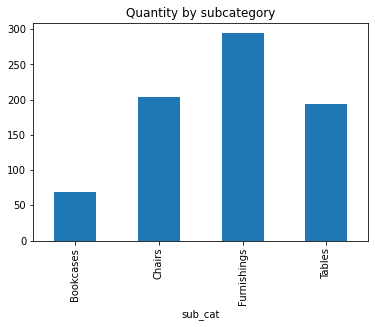

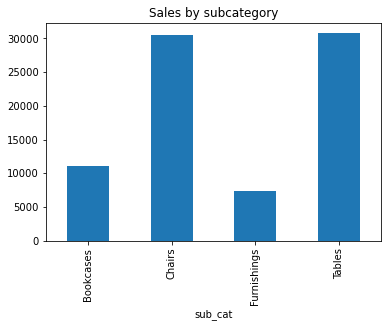

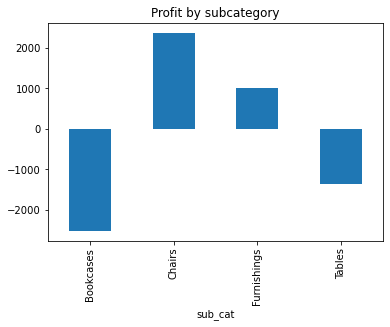

Text(0.5, 1.0, 'Profit Margin by subcategory')

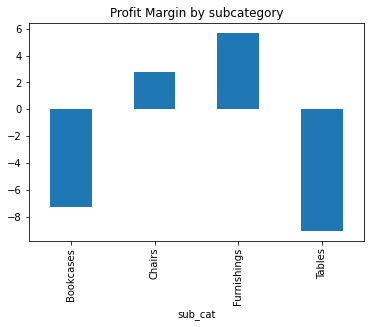

In [61]:
furniture.groupby(furniture.sub_cat).quantity.sum().plot.bar()
plt.title('Quantity by subcategory')
plt.show()

furniture.groupby(furniture.sub_cat).sales.sum().plot.bar()
plt.title('Sales by subcategory')
plt.show()

furniture.groupby(furniture.sub_cat).profit.sum().plot.bar()
plt.title('Profit by subcategory')
plt.show()

furniture.groupby(furniture.sub_cat).profit_margin.sum().plot.bar()
plt.title('Profit Margin by subcategory')

### Takeaway from ^^^: Bookcases seem to be either an area for improvement or for cutting losses

In [29]:
print(f'Total furniture sales: ${furniture.sales.sum():.2f}')
print(f'Total furniture quantity: {furniture.quantity.sum()}')
print(f'Total furniture profit: ${furniture.profit.sum():.2f}')
print(f'Furniture overall unit price: ${(furniture.sales.sum() - furniture.profit.sum()) / furniture.quantity.sum():.2f}')
print(f'Furniture overall raw profit margin: {(furniture.profit.sum() / furniture.sales.sum()) * 100:.2f}%')

Total furniture sales: $79675.38
Total furniture quantity: 761.0
Total furniture profit: $-467.89
Furniture overall unit price: $105.31
Furniture overall raw profit margin: -0.59%


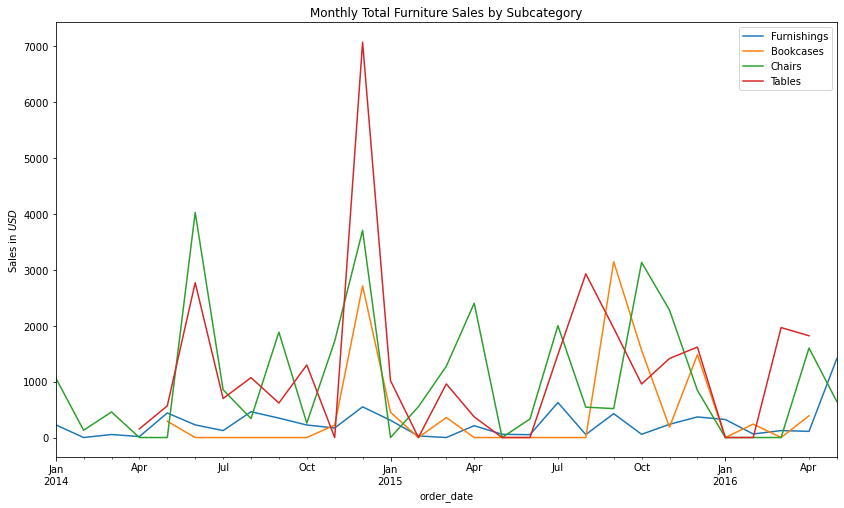

In [30]:
plt.figure(figsize=(14,8))
furniture[furniture.sub_cat == 'Furnishings'].resample('M').sales.sum().plot(label='Furnishings')
furniture[furniture.sub_cat == 'Bookcases'].resample('M').sales.sum().plot(label='Bookcases')
furniture[furniture.sub_cat == 'Chairs'].resample('M').sales.sum().plot(label='Chairs')
furniture[furniture.sub_cat == 'Tables'].resample('M').sales.sum().plot(label='Tables')
plt.ylabel('Sales in $USD$')
plt.title('Monthly Total Furniture Sales by Subcategory')
plt.legend()


In [55]:
ofc_supplies.sub_cat.value_counts()

Binders       122
Paper         103
Storage        83
Art            75
Appliances     36
Labels         30
Envelopes      27
Fasteners      25
Supplies       12
Name: sub_cat, dtype: int64

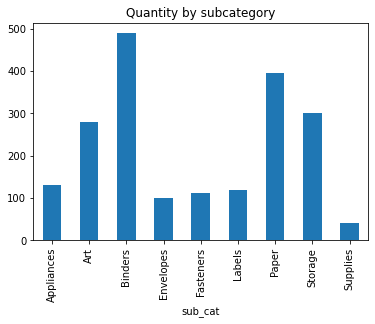

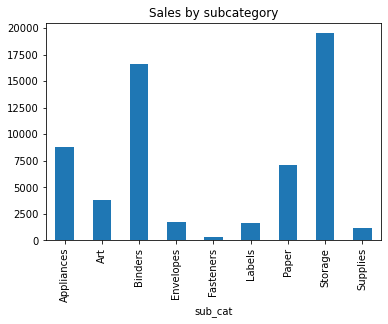

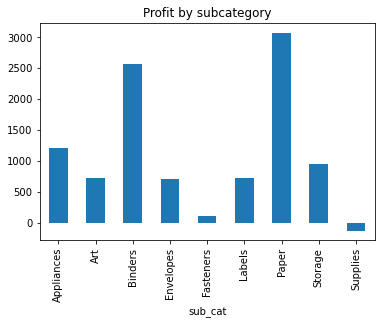

Text(0.5, 1.0, 'Profit Margin by subcategory')

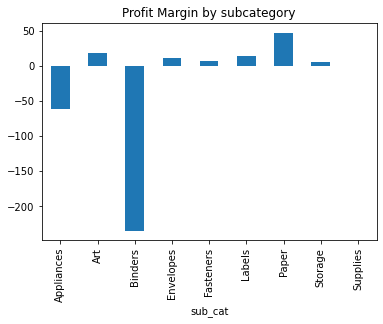

In [31]:
ofc_supplies.groupby(ofc_supplies.sub_cat).quantity.sum().plot.bar()
plt.title('Quantity by subcategory')
plt.show()

ofc_supplies.groupby(ofc_supplies.sub_cat).sales.sum().plot.bar()
plt.title('Sales by subcategory')
plt.show()

ofc_supplies.groupby(ofc_supplies.sub_cat).profit.sum().plot.bar()
plt.title('Profit by subcategory')
plt.show()

ofc_supplies.groupby(ofc_supplies.sub_cat).profit_margin.sum().plot.bar()
plt.title('Profit Margin by subcategory')

### Takeaways ^^^: Thin margins in office supplies; Binders generate profit but have a negative margin (???)

In [58]:
tech.sub_cat.value_counts()

Accessories    79
Phones         76
Machines       12
Copiers         7
Name: sub_cat, dtype: int64

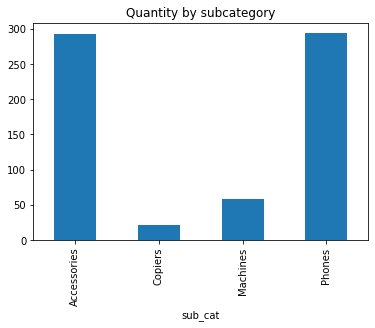

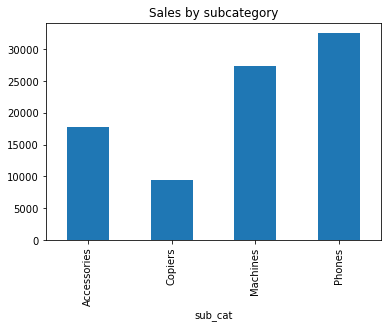

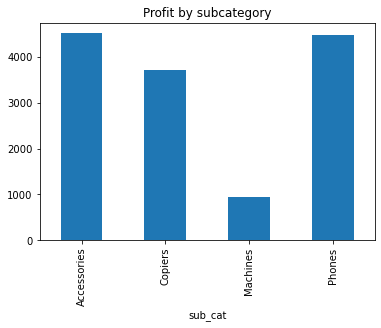

Text(0.5, 1.0, 'Profit Margin by subcategory')

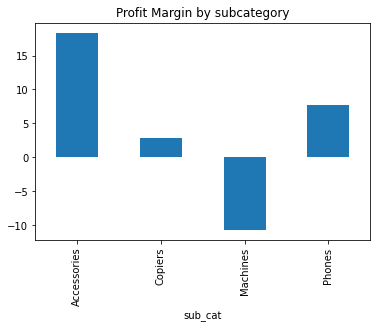

In [60]:
tech.groupby(tech.sub_cat).quantity.sum().plot.bar()
plt.title('Quantity by subcategory')
plt.show()

tech.groupby(tech.sub_cat).sales.sum().plot.bar()
plt.title('Sales by subcategory')
plt.show()

tech.groupby(tech.sub_cat).profit.sum().plot.bar()
plt.title('Profit by subcategory')
plt.show()

tech.groupby(tech.sub_cat).profit_margin.sum().plot.bar()
plt.title('Profit Margin by subcategory')

In [63]:
tech.sample(30)

,product_id,customer_id,order_id,order_date,ship_date,ship_mode,segment,country,city,state,sales,quantity,discount,profit,category,sub_cat,cust_name,prod_name,region,ship_time,unit_price,profit_margin
order_date,,,,,,,,,,,,,,,,,,,,,,
2015-03-28,TEC-AC-10002253,AB-10165,CA-2015-131534,2015-03-28,2015-04-02,Standard Class,Consumer,United States,Los Angeles,California,166.240,1.0,0.0,24.9360,Technology,Accessories,Alan Barnes,Imation Bio 8GB USB Flash Drive Imation Corp,West,5 days,141.3040,0.150000
2014-09-08,TEC-AC-10000023,KC-16255,CA-2014-163293,2014-09-08,2014-09-11,First Class,Corporate,United States,Macon,Georgia,83.880,4.0,0.0,30.1968,Technology,Accessories,Karen Carlisle,"Maxell 74 Minute CD-R Spindle, 50/Pack",South,3 days,13.4208,0.360000
2014-10-29,TEC-PH-10001363,SA-20830,CA-2014-154627,2014-10-29,2014-10-31,First Class,Consumer,United States,Chicago,Illinois,2735.952,6.0,0.2,341.9940,Technology,Phones,Sue Ann Reed,Apple iPhone 5S,Central,2 days,398.9930,0.156250
2015-12-24,TEC-MA-10001148,JB-15925,CA-2015-169397,2015-12-24,2015-12-27,First Class,Consumer,United States,Dublin,Ohio,479.988,4.0,0.7,-383.9904,Technology,Machines,Joni Blumstein,Swingline SM12-08 MicroCut Jam Free Shredder,East,3 days,215.9946,-2.666667
2015-08-09,TEC-PH-10000984,NP-18325,CA-2015-131338,2015-08-09,2015-08-12,First Class,Consumer,United States,New York City,New York,979.950,5.0,0.0,274.3860,Technology,Phones,Naresj Patel,Panasonic KX-TG9471B,East,3 days,141.1128,0.280000
2016-05-09,TEC-AC-10000991,SS-20590,CA-2016-169166,2016-05-09,2016-05-14,Standard Class,Consumer,United States,Seattle,Washington,93.980,2.0,0.0,13.1572,Technology,Accessories,Sonia Sunley,Sony Micro Vault Click 8 GB USB 2.0 Flash Drive,West,5 days,40.4114,0.140000
2016-03-11,TEC-AC-10000171,ON-18715,CA-2016-118255,2016-03-11,2016-03-13,First Class,Corporate,United States,Eagan,Minnesota,45.980,2.0,0.0,19.7714,Technology,Accessories,Odella Nelson,"Verbatim 25 GB 6x Blu-ray Single Layer Recordable Disc, 25/Pack",Central,2 days,13.1043,0.430000
2016-05-20,TEC-PH-10001530,JK-15730,CA-2016-105256,2016-05-20,2016-05-20,Same Day,Consumer,United States,Asheville,North Carolina,1363.960,5.0,0.2,85.2475,Technology,Phones,Joe Kamberova,Cisco Unified IP Phone 7945G VoIP phone,South,0 days,255.7425,0.078125
2015-02-08,TEC-PH-10003931,LH-17020,CA-2015-114923,2015-02-08,2015-02-13,Standard Class,Consumer,United States,Columbus,Ohio,107.982,3.0,0.4,-26.9955,Technology,Phones,Lisa Hazard,JBL Micro Wireless Portable Bluetooth Speaker,East,5 days,44.9925,-0.416667


### Seeing high discounts alongside negative profits/profit margins

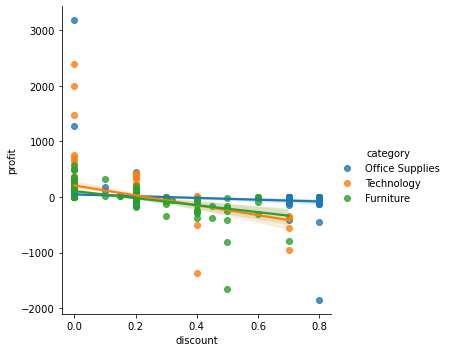

In [78]:
sns.lmplot(data=train, x='discount', y='profit', hue='category')

In [35]:
from scipy import stats

### $H_0:$ There is no relationship between discounts and profit.

### $H_a:$ There is a relationship between discounts and profit.

In [38]:
# Test for linear relationship between discount and profit

alpha = .05
r_coeff, pval = stats.pearsonr(train.discount, train.profit)

if pval < alpha:
    print(f'We can reject the null hypothesis. Our confidence value for this test was {1 - pval:.3f}. Correlation strength: {r_coeff:.3f}')
else:
    print(f'We fail to reject the null hypothesis. Our confidence value for this was {1 - pval:.3f}, which is below our standard of {1 - alpha:.3f}.')


print(f'P-value: {pval}')


We can reject the null hypothesis. Our confidence value for this test was 1.000. Correlation strength: -0.288
P-value: 5.6599384686003276e-18


In [37]:
# Make list of continuous variables
cont_vars = train.select_dtypes(include=np.float64).columns.to_list()
cont_vars

['sales', 'quantity', 'discount', 'profit', 'unit_cost', 'profit_margin']

In [70]:
cont_vars.pop(3)

cont_vars

['sales', 'quantity', 'discount', 'unit_price', 'profit_margin']

### Look for other possible relationships between continuous variables and profit (de facto target)

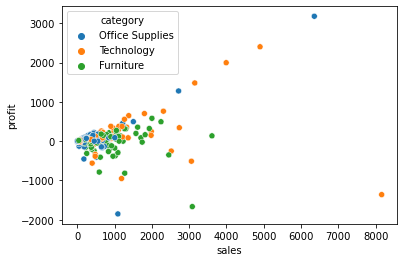

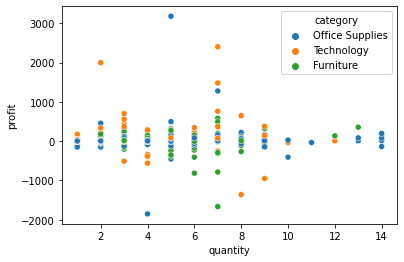

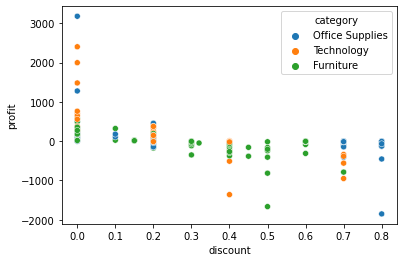

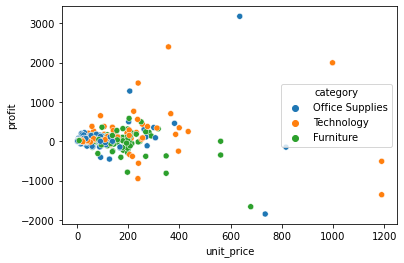

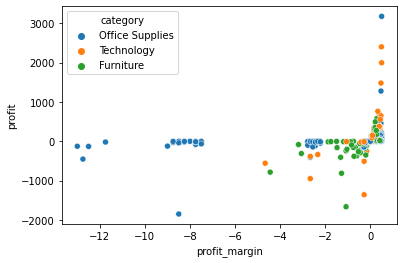

In [71]:
# Loop through continuous variables against profit
for var in cont_vars:
    sns.scatterplot(data= train, x=train[var], y='profit', hue='category')
    plt.show()

Is there a relationship between sales and profit?

### $H_0:$ There is no relationship between sales and profit

### $H_a:$ There is a relationship between sales and profit


In [40]:
r_coeff, pval = stats.pearsonr(train.sales, train.profit)

if pval < alpha:
    print(f'We can reject the null hypothesis. Our confidence value for this test was {1 - pval:.3f}. Correlation strength: {r_coeff:.3f}')
else:
    print(f'We fail to reject the null hypothesis. Our confidence value for this was {1 - pval:.3f}, which is below our standard of {1 - alpha:.3f}.')

print(f'P-value: {pval}')

We can reject the null hypothesis. Our confidence value for this test was 1.000. Correlation strength: 0.344
P-value: 1.9504456024129906e-25
